In [1]:
packages = !pip list
for x in packages:
    if "qiskit" in x:
        print(x)

qiskit                1.1.0
qiskit-aer            0.14.1
qiskit-ibm-runtime    0.23.0


In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
# from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum",token="#")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

### A1. Not Gate |0> to |1>

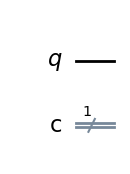

In [3]:
# Let's do an X-gate on a |0> qubit
# Initiating the qubit in |0> and visualizing it
qc = QuantumCircuit(1,1)
qc.draw('mpl')

In [4]:
import qiskit.quantum_info as qi
stv1 = qi.Statevector.from_instruction(qc)
stv1.draw('latex', prefix='Statevector:')

<IPython.core.display.Latex object>

In [5]:
# Printing the matrix form of SV
print(stv1.data)
print('\n',stv1.draw())

[1.+0.j 0.+0.j]

 Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


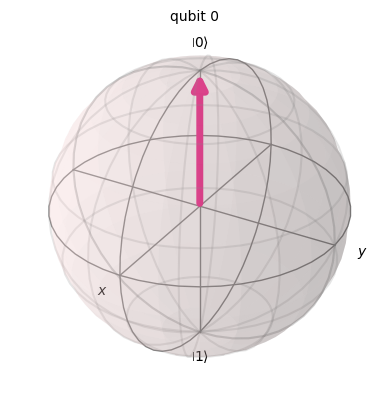

In [6]:
# Visualizing the qubit on Bloch sphere
plot_bloch_multivector(stv1)

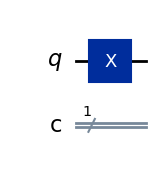

In [7]:
qc.x(0)
qc.draw('mpl')

In [8]:
import qiskit.quantum_info as qi
stv1 = qi.Statevector.from_instruction(qc)
stv1.draw('latex', prefix='Statevector:')

<IPython.core.display.Latex object>

In [9]:
# Printing the matrix form of SV
print(stv1.data)
print('\n',stv1.draw())

[0.+0.j 1.+0.j]

 Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


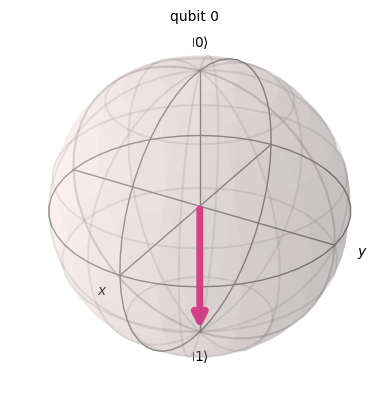

In [10]:
# Visualizing the qubit on Bloch sphere
plot_bloch_multivector(stv1)

In [11]:
from qiskit import QuantumCircuit
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerSimulator,Aer,QasmSimulator

In [12]:
# Use Aer's qasm_simulator

aer_sim=QasmSimulator()

qc.measure([0], [0])
print(qc)

with Session(backend=aer_sim) as session:
    sampler = Sampler(session=session)
    result = sampler.run([qc]).result()

     ┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


c:\Users\NFSBM\miniconda3\envs\qk_1.1\lib\site-packages\qiskit_ibm_runtime\session.py:157: UserWarning: Session is not supported in local testing mode or when using a simulator.
  warnings.warn(
C:\Users\NFSBM\AppData\Local\Temp\ipykernel_16456\2147004573.py:9: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler(session=session)


In [13]:
result.quasi_dists[0]

{1: 1.0}

In [14]:
print(f'Total count for 0 and 1 are: {result.quasi_dists}')
qc.draw()

Total count for 0 and 1 are: [{1: 1.0}]


┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

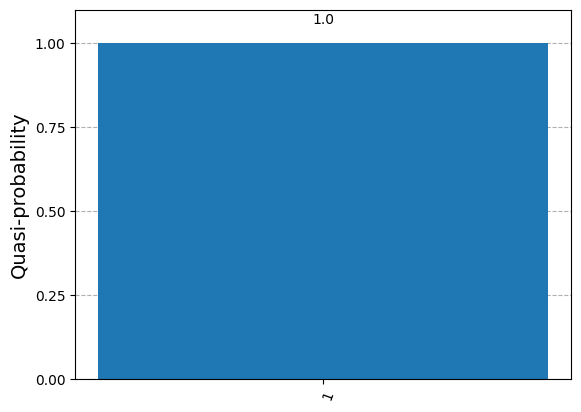

In [15]:
hist1 = plot_histogram(result.quasi_dists, sort='value_desc')
hist1

In [19]:
# from qiskit.primitives import BackendSampler
# sim = Aer.get_backend('qasm_simulator')
# result = sim.execute(qc,shots=10).result()

AttributeError: 'QasmSimulator' object has no attribute 'execute'

In [18]:
# result

Result(backend_name='qasm_simulator', backend_version='0.14.1', qobj_id='', job_id='ce238331-432c-4612-9554-34f9fe009559', success=True, results=[ExperimentResult(shots=10, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 10}), header=QobjExperimentHeader(creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, metadata={}, n_qubits=1, name='circuit-166', qreg_sizes=[['q', 1]]), status=DONE, seed_simulator=1048908877, metadata={'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 1, 'num_clbits': 1, 'time_taken': 0.0023298, 'sample_measure_time': 2.13e-05, 'input_qubit_map': [[0, 0]], 'max_memory_mb': 32547, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 12, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}, time_taken=0.0023298)], date=2024-06-10T11:21:30.662972, status=CO

A2 Exercise

### Ercise: Prepare Single qubit quantum circuit in |1> and then apply Not Gate

Measure the circuit and then repeat above visualization techniques

### B1. Not Gate |+> to |?>

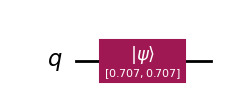

In [16]:
import numpy as np
from qiskit import QuantumCircuit
 
circuit = QuantumCircuit(1)
circuit.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
circuit.draw('mpl')

In [17]:
import qiskit.quantum_info as qi
stv1 = qi.Statevector.from_instruction(circuit)
stv1.draw('latex', prefix='Statevector:')

<IPython.core.display.Latex object>

In [18]:
# Printing the matrix form of SV
print(stv1.data)
print('\n',stv1.draw())

[0.70710678+0.j 0.70710678+0.j]

 Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


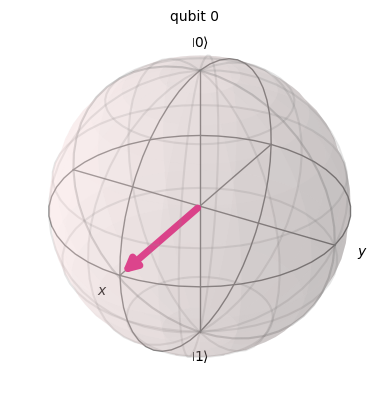

In [19]:
# Visualizing the qubit on Bloch sphere
plot_bloch_multivector(stv1)

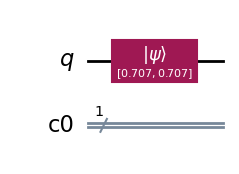

In [20]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister #https://chat.openai.com/c/6eb208a5-650d-48c3-abd7-48423c4e440c

cr = ClassicalRegister(1)

circuit.add_register(cr) # Adding classical register to the already initialized quantum circuit

circuit.draw('mpl')

In [21]:
from qiskit import QuantumCircuit
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [22]:
# Use Aer's qasm_simulator
from qiskit_aer import AerSimulator,QasmSimulator
aer_sim=QasmSimulator()
circuit.measure([0], [0])

with Session(backend=aer_sim) as session:
    sampler = Sampler(session=session)
    result = sampler.run([circuit]).result()

C:\Users\NFSBM\AppData\Local\Temp\ipykernel_2528\66579598.py:7: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler(session=session)


Total count for 0 and 1 are: [{1: 0.4945, 0: 0.5055}]


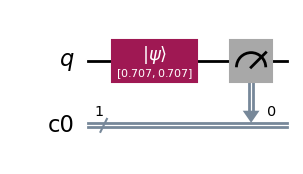

In [23]:
result
print(f'Total count for 0 and 1 are: {result.quasi_dists}')
circuit.draw('mpl')

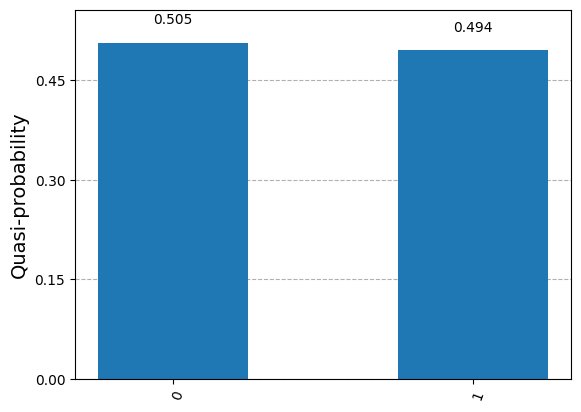

In [24]:
hist1 = plot_histogram(result.quasi_dists)
hist1

In [25]:
aer_sim.set_max_qubits(max_qubits=1)
result = aer_sim.run(circuit,shots=100,memory=True)
result.result()

Result(backend_name='qasm_simulator', backend_version='0.14.1', qobj_id='', job_id='e6d4be32-9d12-4a67-9d20-fcf8cafbaf23', success=True, results=[ExperimentResult(shots=100, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 41, '0x1': 59}, memory=['0x0', '0x0', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x0', '0x0', '0x0', '0x1', '0x0', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x0', '0x0', '0x0', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x1', '0x0', '0x0', '0x0', '0x1', '0x0', '0x0', '0x1', '0x0', '0x1', '0x0', '0x0', '0x1', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1']), header=QobjExperimentHeader(cre

In [26]:
res1 = result.result().results[0].data.counts

Total count for 0x0 and 0x1 are: {'0x0': 41, '0x1': 59}


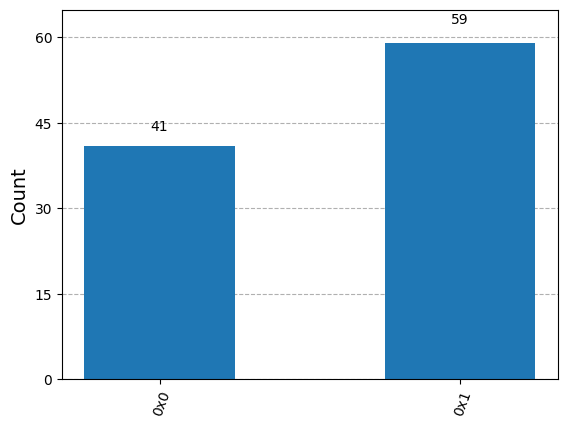

In [27]:
res1
print(f'Total count for 0x0 and 0x1 are: {res1}')
circuit.draw('mpl')
hist1 = plot_histogram(res1)
hist1

Total count for 0x0 and 0x1 are: {'0x1': 506, '0x0': 494}


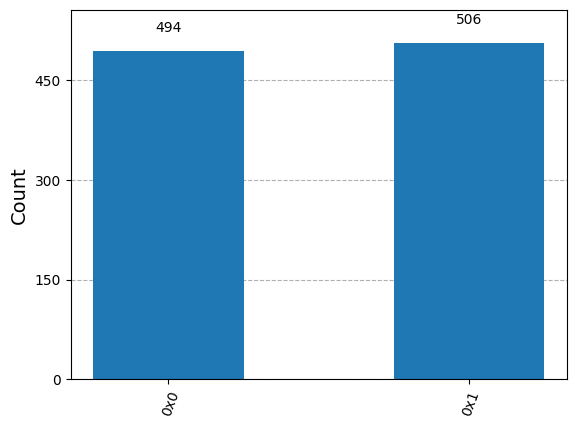

In [28]:
result = aer_sim.run(circuit,shots=1000,memory=True)
result.result()
res2 = result.result().results[0].data.counts
res2
print(f'Total count for 0x0 and 0x1 are: {res2}')
circuit.draw('mpl')
hist2 = plot_histogram(res2)
hist2

#### The result of Not gate on |+> is |+>

B2 Exercise: Not Gate |-> to |?>
### The Not gate acting on |+> and |-> state leaves the state unchanged, why?

### C1. Not gate on |+i> to |?>

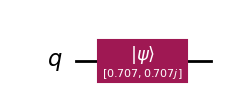

In [29]:
import numpy as np
from qiskit import QuantumCircuit
 
circuit = QuantumCircuit(1)
circuit.initialize([1/np.sqrt(2) ,  1j/np.sqrt(2)])
circuit.draw('mpl')

In [30]:
import qiskit.quantum_info as qi
stv1 = qi.Statevector.from_instruction(circuit)
stv1.draw('latex', prefix='Statevector:')

<IPython.core.display.Latex object>

In [31]:
# Printing the matrix form of SV
print(stv1.data)
print('\n',stv1.draw())

[0.70710678+0.j         0.        +0.70710678j]

 Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


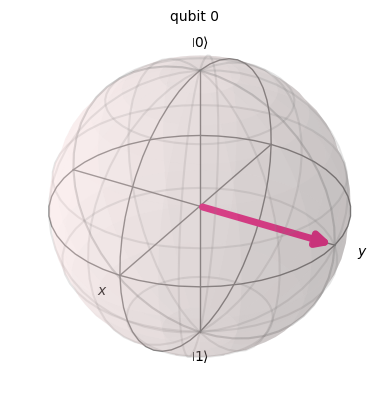

In [32]:
# Visualizing the qubit on Bloch sphere
plot_bloch_multivector(stv1)

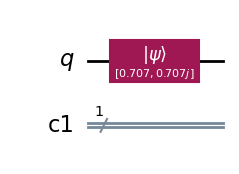

In [33]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister #https://chat.openai.com/c/6eb208a5-650d-48c3-abd7-48423c4e440c

cr = ClassicalRegister(1)

circuit.add_register(cr) # Adding classical register to the already initialized quantum circuit

circuit.draw('mpl')

In [34]:
from qiskit import QuantumCircuit
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [35]:
# Use Aer's qasm_simulator
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()


circuit.measure([0], [0])
print(circuit)

from qiskit import QuantumCircuit
with Session(backend=aer_sim) as session:
    sampler = Sampler(session=session)
    result = sampler.run([circuit]).result()

      ┌──────────────────────────────┐┌─┐
   q: ┤ Initialize(0.70711,0.70711j) ├┤M├
      └──────────────────────────────┘└╥┘
c1: 1/═════════════════════════════════╩═
                                       0 


C:\Users\NFSBM\AppData\Local\Temp\ipykernel_2528\2581915169.py:11: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler(session=session)


Total count for 0 and 1 are: [{1: 0.49025, 0: 0.50975}]


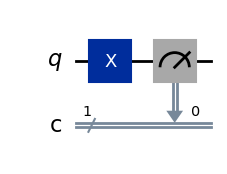

In [36]:
result
print(f'Total count for 0 and 1 are: {result.quasi_dists}')
qc.draw('mpl')

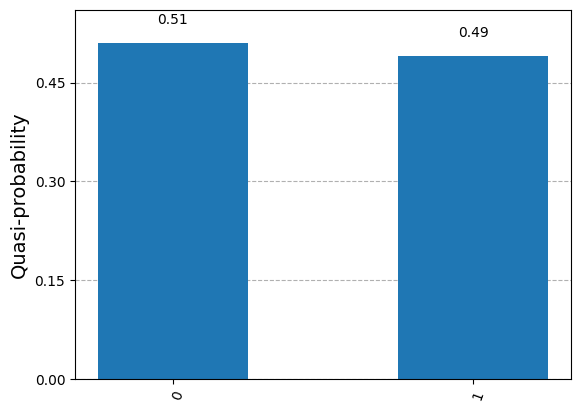

In [37]:
hist1 = plot_histogram(result.quasi_dists)
hist1

Total count for 0x0 and 0x1 are: {'0x0': 50, '0x1': 50}


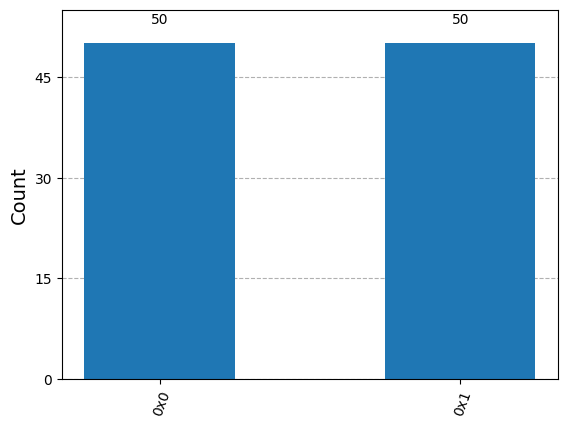

In [38]:
result = aer_sim.run(circuit,shots=100,memory=True)
result.result()
res2 = result.result().results[0].data.counts
res2
print(f'Total count for 0x0 and 0x1 are: {res2}')
circuit.draw('mpl')
hist2 = plot_histogram(res2)
hist2

Total count for 0x0 and 0x1 are: {'0x0': 480, '0x1': 520}


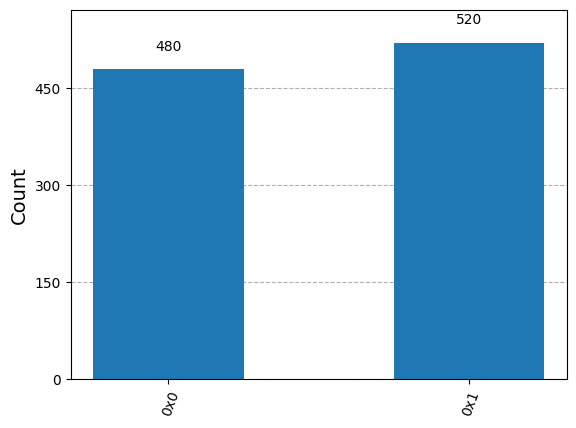

In [39]:
result = aer_sim.run(circuit,shots=1000,memory=True)
result.result()
res2 = result.result().results[0].data.counts
res2
print(f'Total count for 0x0 and 0x1 are: {res2}')
circuit.draw('mpl')
hist2 = plot_histogram(res2)
hist2